In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
train_data.shape

(404, 13)

In [3]:
# 注意,用于测试数据标准化的均值和标准差都是在训练数据上计算得到的。
# 在工作流程中,你不能使用在测试数据上计算得到的任何结果,即使是像数据标准化这么简单的事情也不行。
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [4]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [5]:
%%time
# k-fold
import numpy as np

k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 100 
all_scores = []  
for i in range(k):     
    print('processing fold #', i)     
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]      
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]      
    partial_train_data = np.concatenate(           
        [train_data[:i * num_val_samples],          
         train_data[(i + 1) * num_val_samples:]],          
        axis=0)     
    partial_train_targets = np.concatenate(         
        [train_targets[:i * num_val_samples],          
         train_targets[(i + 1) * num_val_samples:]],          
        axis=0)      
    model = build_model()      
    model.fit(partial_train_data, partial_train_targets,                
              epochs=num_epochs, batch_size=1, verbose=0)     
    val_mse,  val_mae = model.evaluate(val_data, val_targets, verbose=0)      
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
CPU times: user 1min 59s, sys: 12.8 s, total: 2min 12s
Wall time: 1min 41s


In [6]:
np.mean(all_scores)

2.635672390460968

In [7]:
%%time
num_epochs = 500  
all_mae_histories = []  
for i in range(k):     
    print('processing fold #', i)     
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]        
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]      
    partial_train_data = np.concatenate(            
        [train_data[:i * num_val_samples],          
         train_data[(i + 1) * num_val_samples:]],          
        axis=0)      
    partial_train_targets = np.concatenate(         
        [train_targets[:i * num_val_samples],          
         train_targets[(i + 1) * num_val_samples:]],         
        axis=0)      
    model = build_model()       
    history = model.fit(partial_train_data, partial_train_targets,                           
                        validation_data=(val_data, val_targets),                         
                        epochs=num_epochs, batch_size=1, verbose=0)     
#     mae_history = history.history['val_mean_absolute_error']  
    mae_history = history.history['val_mae']
#     print(history.history.keys())  # dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
CPU times: user 12min, sys: 1min 6s, total: 13min 6s
Wall time: 10min 49s


In [8]:
len(all_mae_histories), len(all_mae_histories[0])

(4, 500)

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
len(average_mae_history)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

In [10]:
len(average_mae_history)

500

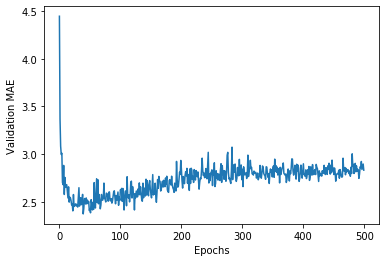

In [11]:
import matplotlib.pyplot as plt

plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

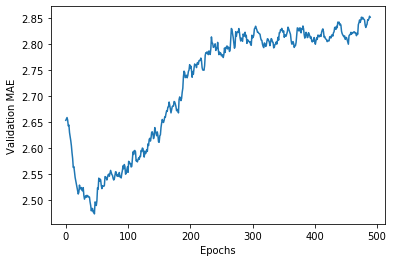

In [12]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [13]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 204us/step


In [14]:
test_mae_score

2.8330039978027344